# Unicorn Investors Network Analysis 

In this notebook, I explore the network of investors funding unicorn startups worldwide.  
We will build an investor–investor co-investment network, analyze its structure, identify key players, discover communities, and suggest potential new connections.

**Notebook contents:**
1. Data preparation
2. Investor-investor co-investing network construction
3. Network visualization
4. Network construct analysis
5. Community mining
6. Recommendation system

In [2]:
from collections import defaultdict
from itertools import combinations

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms.community import louvain_communities
from nxviz import circos

## 1. Data preparation

In [3]:
df = pd.read_excel("CB-Insights_Global-Unicorn-Club_2025.xlsx",
                   sheet_name="Unicorns",
                   skiprows=2,
                   usecols="B:H").dropna()

df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,SpaceX,350.0,2012-12-01,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
1,ByteDance,300.0,2017-04-07,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
2,OpenAI,300.0,2019-07-22,United States,San Francisco,Enterprise Tech,"Khosla Ventures, Thrive Capital, Sequoia Capital"
3,Stripe,70.0,2014-01-23,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
5,Databricks,62.0,2019-02-05,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, New Enterprise Associates..."
...,...,...,...,...,...,...,...
1300,LeadSquared,1.0,2022-06-21,India,Bengaluru,Enterprise Tech,"Gaja Capital Partners, Stakeboat Capital, West..."
1301,FourKites,1.0,2022-06-21,United States,Chicago,Enterprise Tech,"Hyde Park Venture Partners, Bain Capital Ventu..."
1302,VulcanForms,1.0,2022-07-05,United States,Burlington,Industrials,"Eclipse Ventures, D1 Capital Partners, Industr..."
1303,SingleStore,1.0,2022-07-12,United States,San Francisco,Enterprise Tech,"Google Ventures, Accel, Data Collective"


In [4]:
df["Investors"] = df["Select Investors"].dropna().apply(
    lambda x: [investor.strip() 
               for investor in x.split(",")]
)

df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Investors
0,SpaceX,350.0,2012-12-01,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen...","[Founders Fund, Draper Fisher Jurvetson, Rothe..."
1,ByteDance,300.0,2017-04-07,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S...","[Sequoia Capital China, SIG Asia Investments, ..."
2,OpenAI,300.0,2019-07-22,United States,San Francisco,Enterprise Tech,"Khosla Ventures, Thrive Capital, Sequoia Capital","[Khosla Ventures, Thrive Capital, Sequoia Capi..."
3,Stripe,70.0,2014-01-23,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG","[Khosla Ventures, LowercaseCapital, capitalG]"
5,Databricks,62.0,2019-02-05,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, New Enterprise Associates...","[Andreessen Horowitz, New Enterprise Associate..."
...,...,...,...,...,...,...,...,...
1300,LeadSquared,1.0,2022-06-21,India,Bengaluru,Enterprise Tech,"Gaja Capital Partners, Stakeboat Capital, West...","[Gaja Capital Partners, Stakeboat Capital, Wes..."
1301,FourKites,1.0,2022-06-21,United States,Chicago,Enterprise Tech,"Hyde Park Venture Partners, Bain Capital Ventu...","[Hyde Park Venture Partners, Bain Capital Vent..."
1302,VulcanForms,1.0,2022-07-05,United States,Burlington,Industrials,"Eclipse Ventures, D1 Capital Partners, Industr...","[Eclipse Ventures, D1 Capital Partners, Indust..."
1303,SingleStore,1.0,2022-07-12,United States,San Francisco,Enterprise Tech,"Google Ventures, Accel, Data Collective","[Google Ventures, Accel, Data Collective]"


## 2. Investor–Investor Co-Investment Network Construction

I build an unipartite network where:
- each node = an investor
- edge = two investors both invested in a unicorn

In [5]:
G = nx.Graph()
for _, row in df.iterrows():
    company = row['Company']
    investors = [i.strip() for i in row['Select Investors'].split(',') if i.strip()]
    for investor1, investor2 in combinations(investors, 2):
            if investor1 != investor2:
                if G.has_edge(investor1, investor2):
                    G[investor1][investor2]['weight'] += 1
                else:
                    G.add_edge(investor1, investor2, weight=1)

In [6]:
type(G)

networkx.classes.graph.Graph

In [10]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 1357
Number of edges: 2973


The graph type ".graph.Graph" confirm that this is an undirected graph, consisting of 1357 nodes (= investors) and 2973 edges (= mutual investment between two nodes).

## 3. Network visualization

Let's visualize our network using a circos plot. In a circos plot, data points are arranged in a circle, and edges are rerpesented with lines.

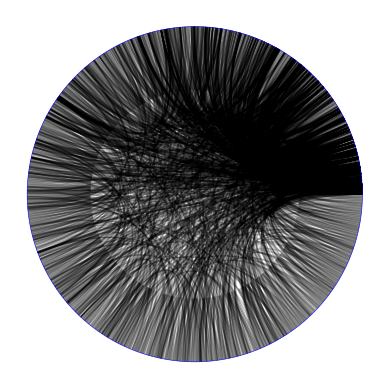

In [11]:
c = circos(G)
plt.show()

Hmm, this is hard to interpret or extract any information. Now let's visualize 50 most influential investors and the communities among these 50 people. So in short, I will:
- Identify 50 top investors with highest degree. Degree is defined as the number of direct connections that a particular node has with other nodes. The higher degree an investor has, the more connected and important it is to the network.

- Find the communities among these investors using louvain community detection algorithm.

In [12]:
degree_dict = dict(G.degree())
top50_investors = sorted(degree_dict, key=degree_dict.get, reverse=True)[:50]
G_top50_investors = G.subgraph(top50_investors)

In [25]:
communities = louvain_communities(G_top50_investors, weight='weight')

partition = {}
for i, comm in enumerate(communities):
    for node in comm:
        partition[node] = i

node_colors = [partition[node] for node in G_top50_investors.nodes()]
node_sizes = [degree_dict[node]*20 for node in G_top50_investors.nodes()]

In [26]:
print("Number of detected communities among top 50 investors:", len(communities))

Number of detected communities among top 50 investors: 4


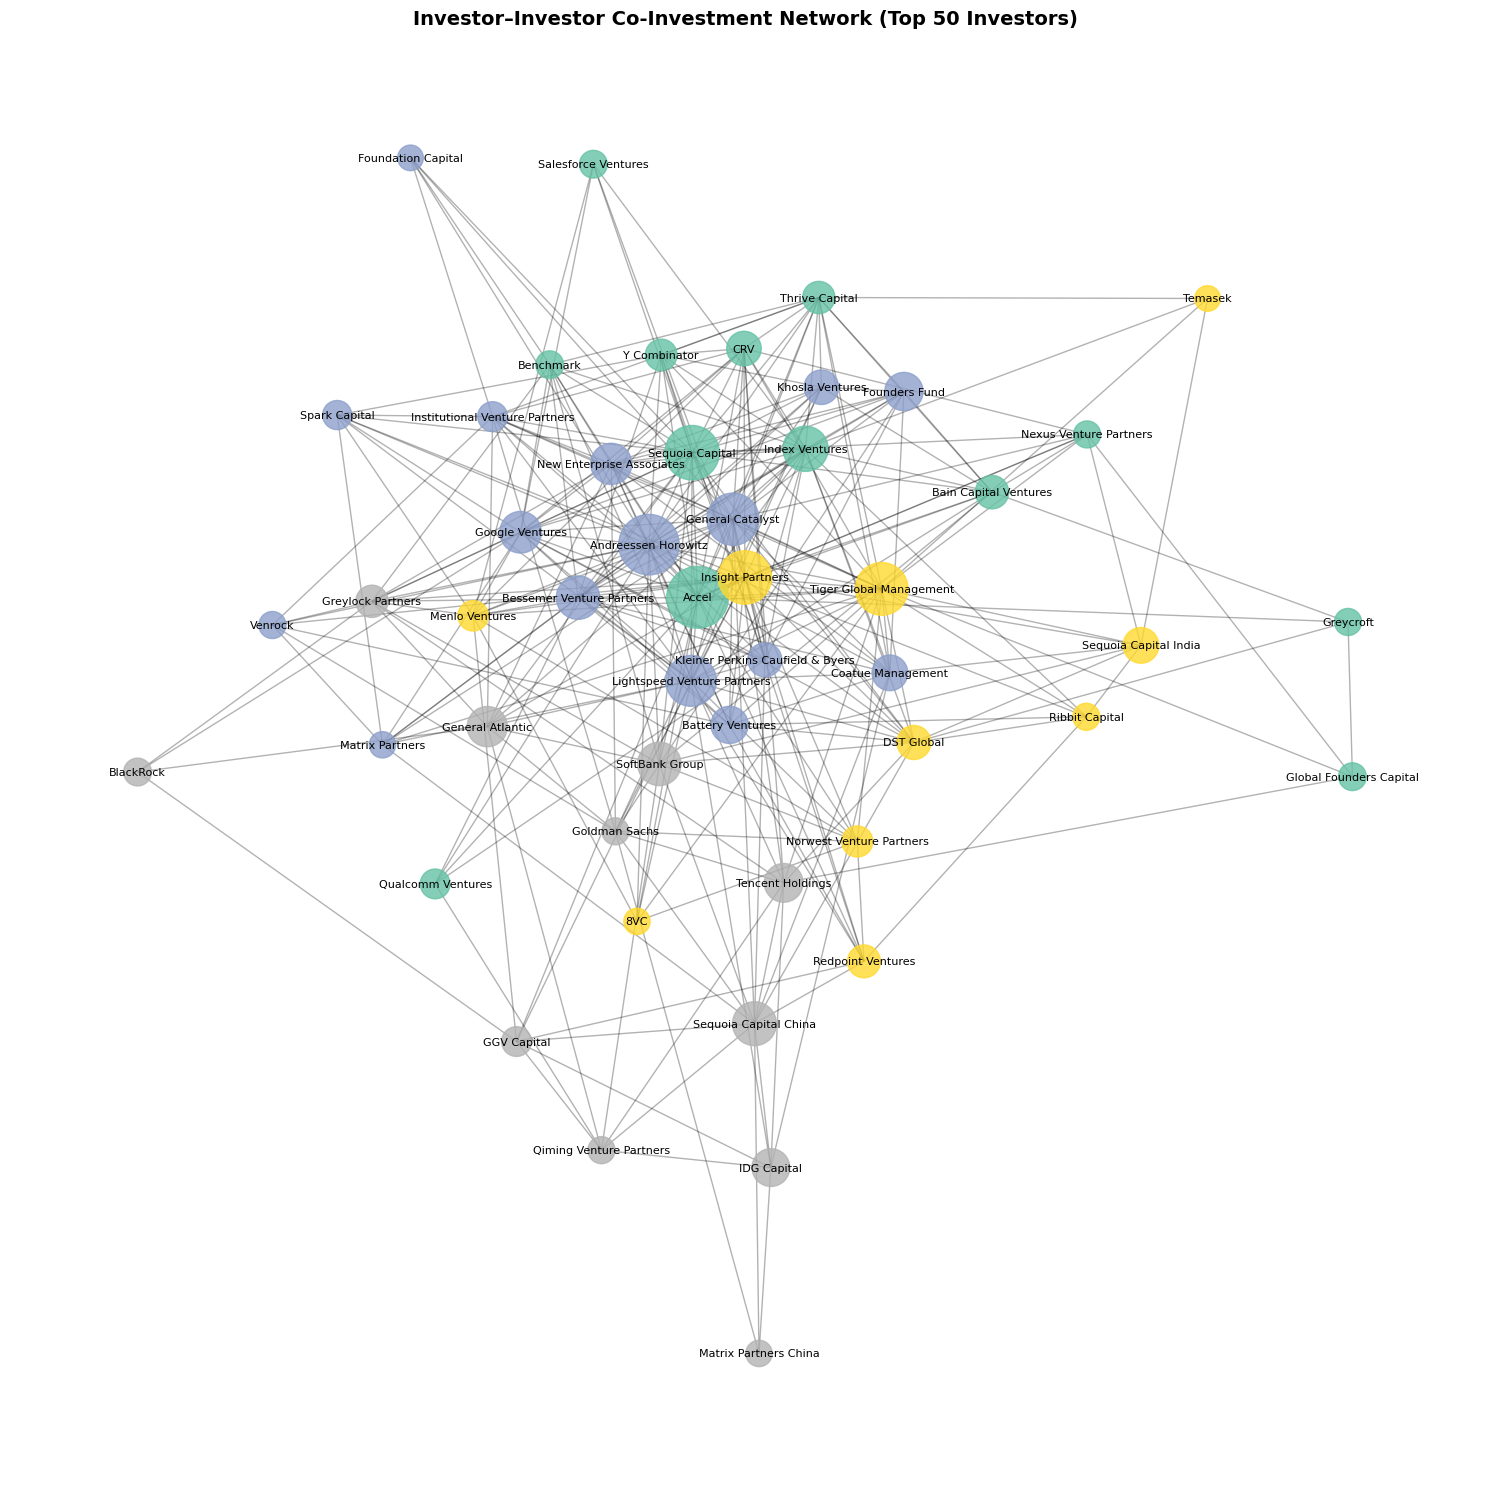

In [27]:
plt.figure(figsize=(15, 15))
position = nx.spring_layout(G_top50_investors, k=0.3, seed=42)
nx.draw_networkx_nodes(G_top50_investors, position, 
                       node_color=node_colors, 
                       node_size=node_sizes, 
                       cmap=plt.cm.Set2, alpha=0.8)
nx.draw_networkx_edges(G_top50_investors, position, alpha=0.3)
nx.draw_networkx_labels(G_top50_investors, position, font_size=8)

plt.title("Investor–Investor Co-Investment Network (Top 50 Investors)",
          fontsize=14, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

Based on the size of the nodes, most important investors with most connections with others are: Accel, Andreessen Horowitz, Sequoia Capital, Insight Partners and Tiger Global Management. These most influential investors spread out across the four detected communities:

- Accel, Sequoia Capital, Index Ventures, Bain Capital Ventures...
- Tiger Global Management, Insight Partners, Sequoia Capital India, DST Global...
- Andreessen Horowitz, General Catalyst, Google Ventures, Bessemer Venture Partners, New Enterprise Associates...
- SoftBank Group, Sequoia Capital China, Tencent Holdings, General Atlantic...

## 4. Network structure analysis

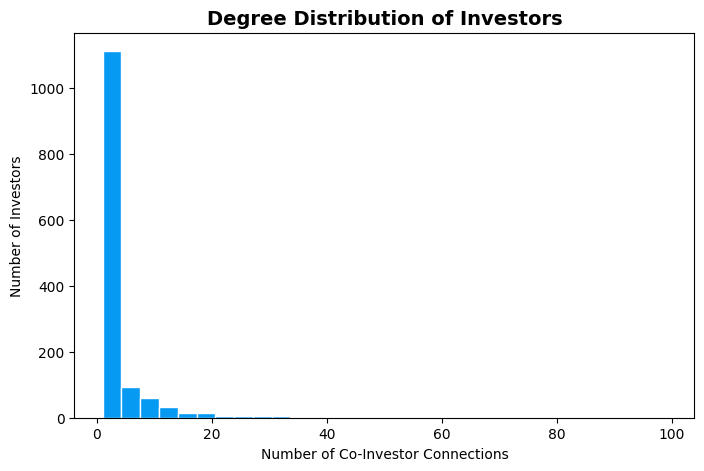

In [29]:
degree_values = list(degree_dict.values())
plt.figure(figsize=(8,5))
plt.hist(degree_values, bins=30, color="#069AF3", edgecolor="white")
plt.title("Degree Distribution of Investors", fontsize=14, weight="bold")
plt.xlabel("Number of Co-Investor Connections")
plt.ylabel("Number of Investors")
plt.show()

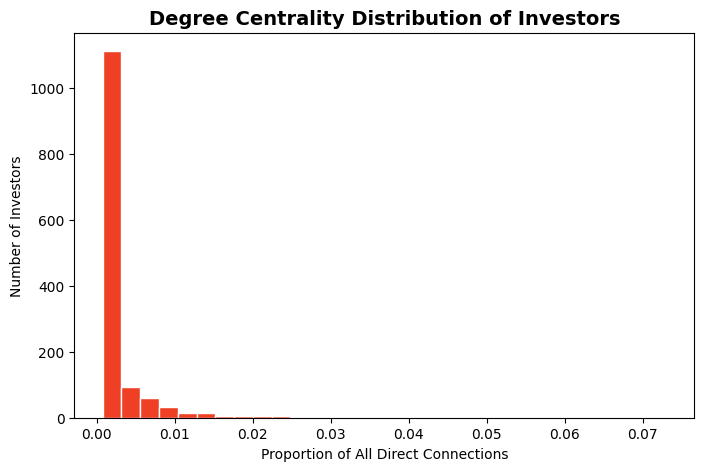

In [18]:
degree_centrality_dict = nx.degree_centrality(G)
degree_centrality_list = list(degree_centrality_dict.values())

plt.figure(figsize=(8,5))
plt.hist(degree_centrality_list, bins=30, color="#EF4026", edgecolor="white")
plt.title("Degree Centrality Distribution of Investors", fontsize=14, weight="bold")
plt.xlabel("Proportion of All Direct Connections")
plt.ylabel("Number of Investors")
plt.show()

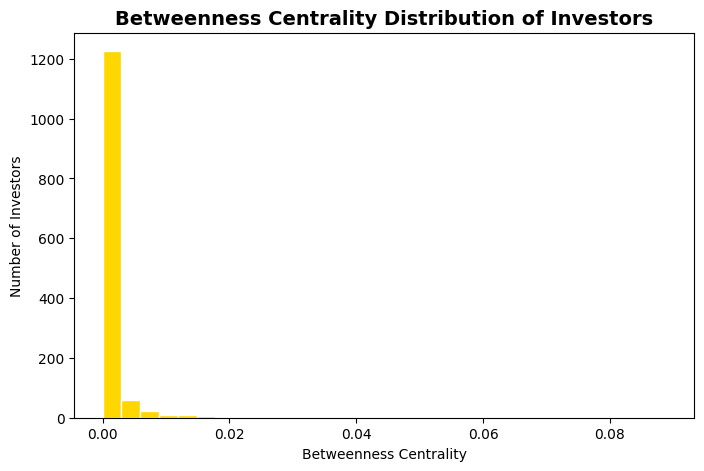

In [19]:
betweenness_centrality_dict = nx.betweenness_centrality(G)
betweenness_centrality_list = list(betweenness_centrality_dict.values())

plt.figure(figsize=(8,5))
plt.hist(betweenness_centrality_list, bins=30, color="#FFD700", edgecolor="white")
plt.title("Betweenness Centrality Distribution of Investors", fontsize=14, weight="bold")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Investors")
plt.show()

In [20]:
top_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Investors by Degree (Number of Co-Investors):")
for investor, degree in top_degree:
    print(f"     {investor}: {degree}")

Top Investors by Degree (Number of Co-Investors):
     Accel: 99
     Andreessen Horowitz: 95
     Sequoia Capital: 77
     Insight Partners: 74
     Tiger Global Management: 72
     General Catalyst: 71
     Lightspeed Venture Partners: 67
     Index Ventures: 53
     Sequoia Capital China: 50
     SoftBank Group: 49


How about plotting the node with highest degree centrality and its neighbors? This will help us to identify the first degree connections of the most influential investor, having the highest chance of getting the information from this investor.

In [30]:
max_degree_centrality = max(degree_centrality_list)

most_frequently_investing_list = [investor 
                           for investor, degree_centrality in degree_centrality_dict.items()
                           if degree_centrality == max_degree_centrality]
print(most_frequently_investing_list)

['Accel']


In [31]:
most_frequently_investing = most_frequently_investing_list[0]
most_frequently_investing

'Accel'

In [32]:
neighbors_list = list(G.neighbors(most_frequently_investing))
neighbors_list.append(most_frequently_investing)
nodes_to_draw = neighbors_list
G_most_investing = G.subgraph(nodes_to_draw)

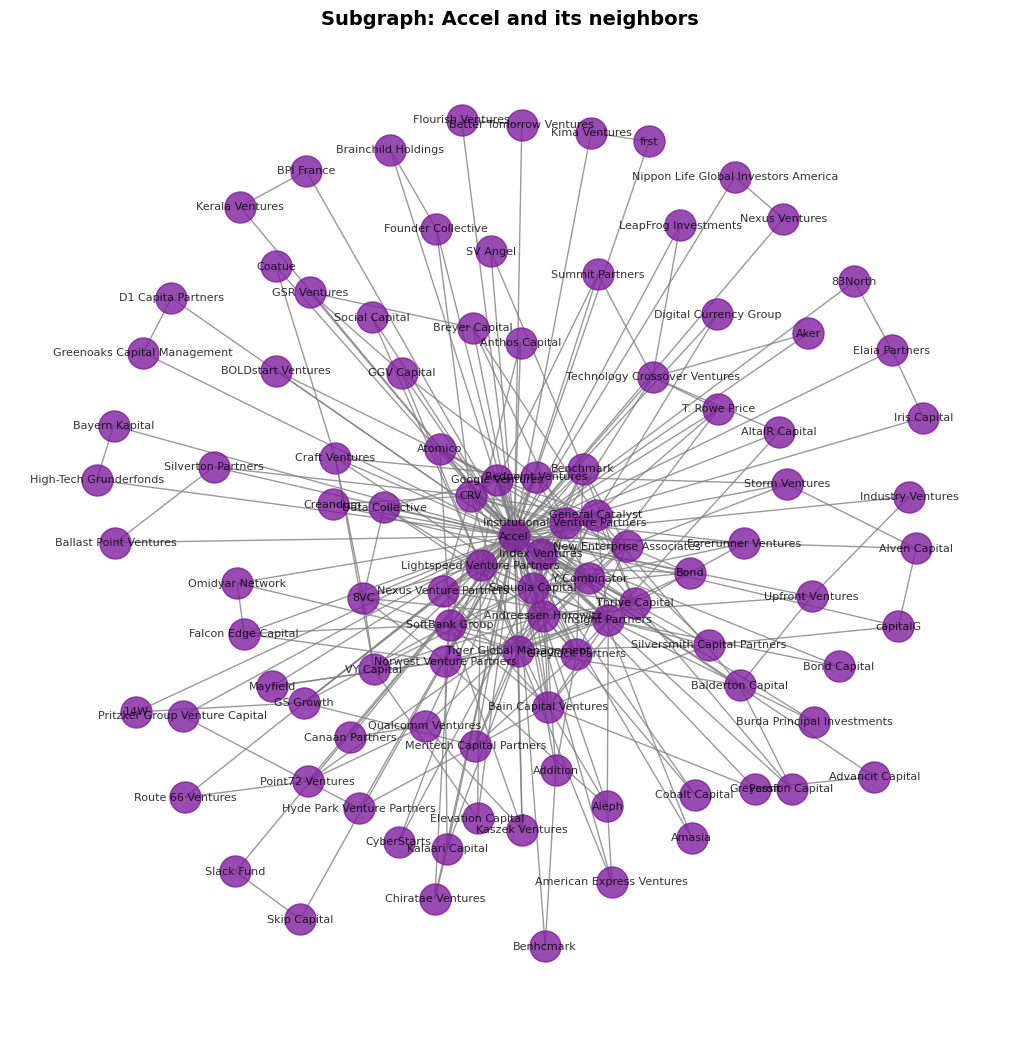

In [39]:
plt.figure(figsize=(10, 10))
position = nx.spring_layout(G_most_investing, k=0.3)
nx.draw(G_most_investing, position, with_labels=True, node_size=500, 
        node_color='#7E1E9C', edge_color='gray', font_size=8, alpha=0.8)
plt.title(f"Subgraph: {most_frequently_investing} and its neighbors", fontsize=14, weight='bold')
plt.show()

## 5. Community mining

In [40]:
communities = louvain_communities(G, weight='weight', seed=42)
num_comms = len(communities)
print(f"Detected {num_comms} investor communities")

Detected 98 investor communities


### 5.1. Largest community by Louvain community detection algorithm

Louvain community detection algorithm heuristicaly partitions the graph into communities using modularity optimization. Investors within a community tend to co-invest more often, forming core network of global unicorn investors or niche groups or regional networks.

In [41]:
largest_community_nodes = max(communities, key=len)
G_communities = G.subgraph(largest_community_nodes)

In [42]:
print(f"The largest community has:\n- {G_communities.number_of_nodes()} nodes\n- {G_communities.number_of_edges()} edges")

The largest community has:
- 155 nodes
- 356 edges


In [46]:
list(G_communities)

['LeapFrog Investments',
 'Sherpalo Ventures',
 'VY Capital',
 'CRV',
 'Aker',
 'Obvious Ventures',
 'Coatue Management',
 'Shell Ventures',
 'Amplify Partners',
 'CyberStarts',
 'Sound Ventures',
 'Astarc Ventures',
 'Benchmark',
 'Mithril Capital Management',
 'Norma Investments',
 'Reach Capital',
 'Silverton Partners',
 'U.S. Venture Partners',
 'Kleiner Perkins Caufield & Byers',
 'Nippon Life Global Investors America',
 'Kima Ventures',
 'Benhcmark',
 'MenloVentures',
 'Long Journey Ventures',
 'Cobalt Capital',
 'Google Ventures',
 'Index Ventures',
 'Draft Ventures',
 'Flourish Ventures',
 'FirstMark Capital',
 'kt investment',
 'Sequoia Capital',
 'BMO Capital',
 'Kerala Ventures',
 'FinVC',
 'Bloomberg Beta',
 'Section 32',
 'Portag3 Ventures',
 'Neuberger Berman',
 '1517 Fund',
 'Stripes Group',
 'Caffeinated Capital',
 'WRVI Capital',
 'Workday Ventures',
 'Thoma Bravo',
 'Sofinnova Partners',
 'Tenaya Capital',
 'Ballast Point Ventures',
 'North Bridge Venture Partners',
 

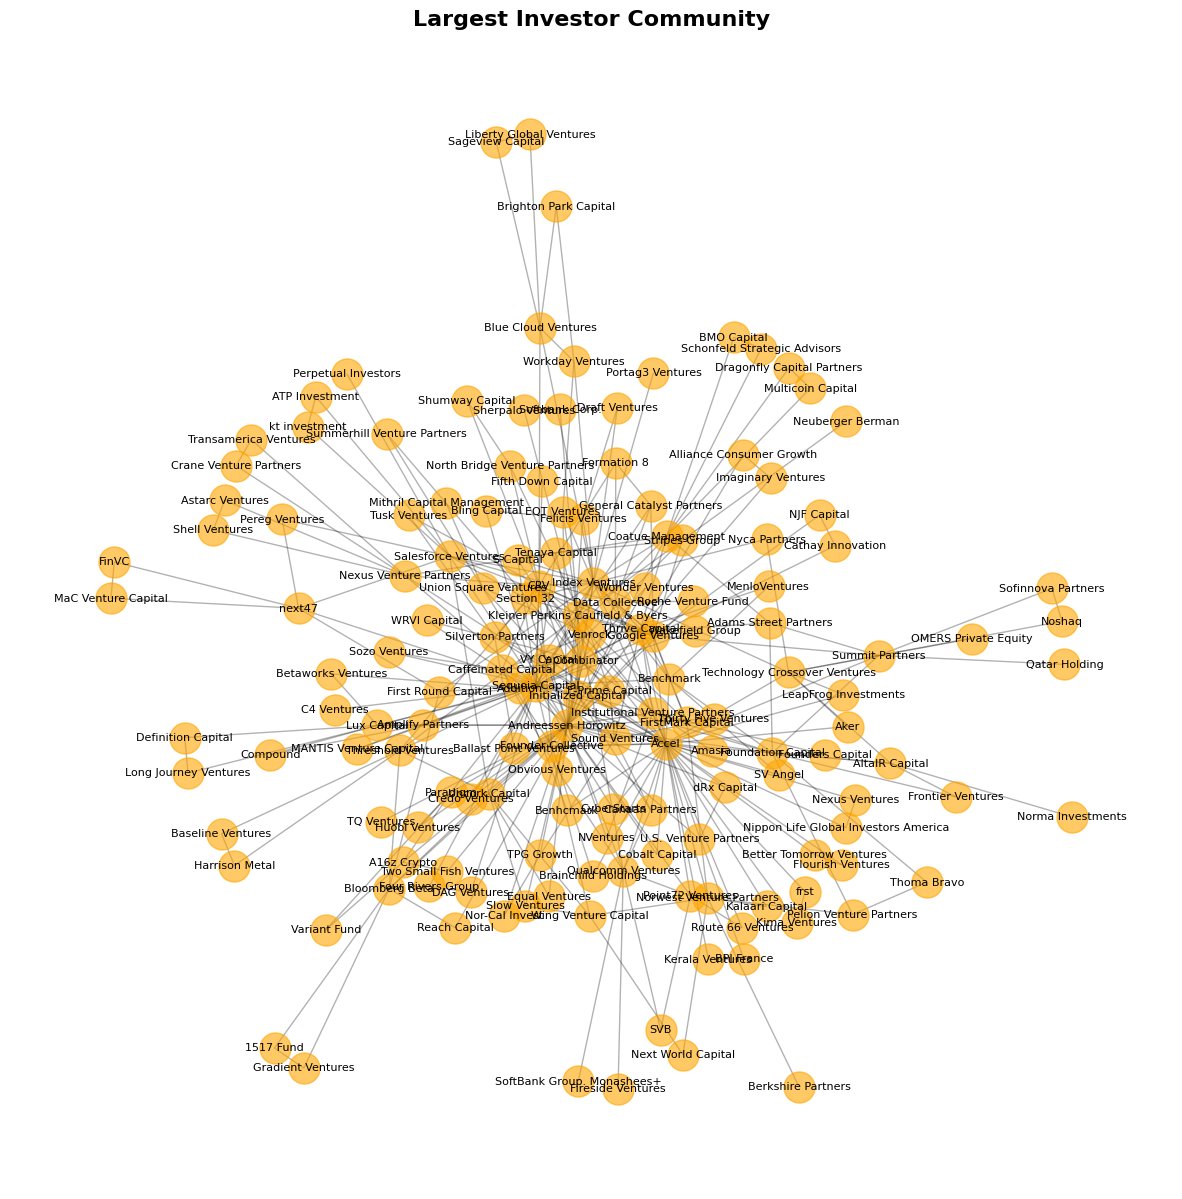

In [44]:
plt.figure(figsize=(15, 15))
position = nx.spring_layout(G_communities, seed=42)
nx.draw_networkx_nodes(G_communities, position, node_color='orange', node_size=500, alpha=0.6)
nx.draw_networkx_edges(G_communities, position, alpha=0.3)
nx.draw_networkx_labels(G_communities, position, font_size=8)

plt.title("Largest Investor Community", fontsize=16, weight='bold')
plt.axis('off')
plt.show()

### 5.1. Largest community by maximal cliques

A network clique is a completely connected graph, representing a tightly-knit group of investors that all co-invested with each other. A maximal clique is a clique that cannot be extended by adding another node without breaking the "all-connected" rule.

The largest maximal clique is the biggest group of investors that have all co-invested at least once.

In [47]:
cliques = nx.find_cliques(G)

largest_clique = sorted(cliques, key=lambda x:len(x))[-1]
G_largest_clique = G.subgraph(largest_clique)

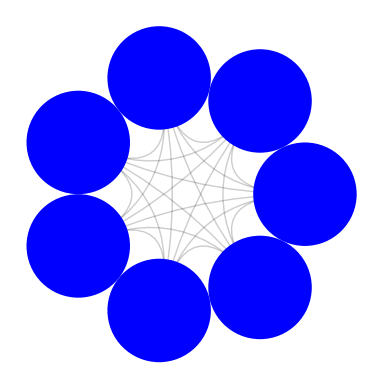

In [49]:
c = circos(G_largest_clique)
plt.show()

The identified largest maximal clique consists of 7 investors. Let's see who they are!

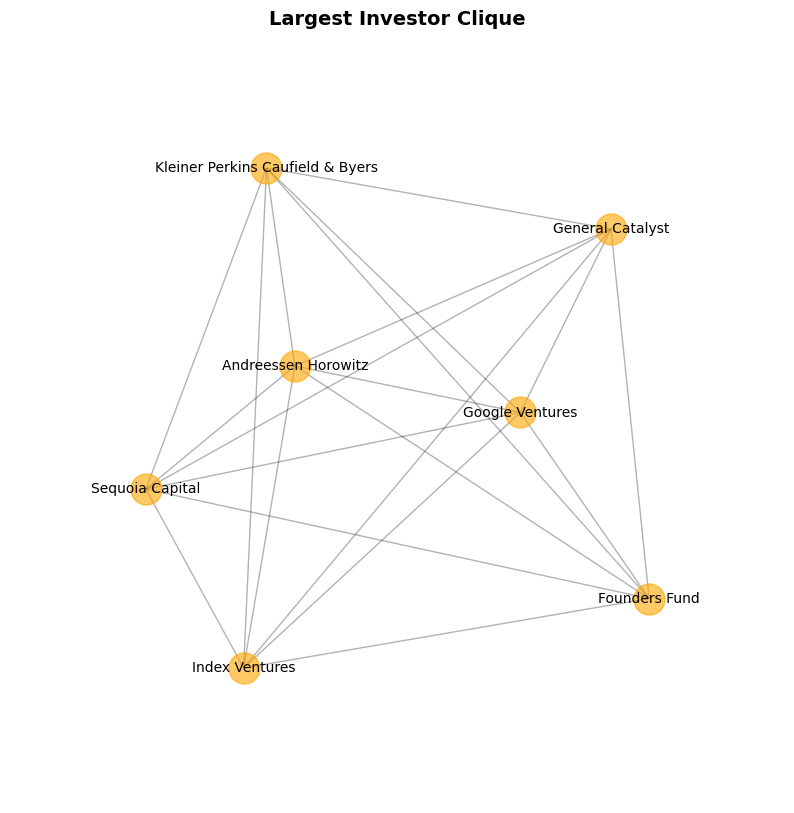

In [48]:
plt.figure(figsize=(10, 10))
position = nx.spring_layout(G_largest_clique, seed=42)
nx.draw_networkx_nodes(G_largest_clique, position, node_color='orange', node_size=500, alpha=0.6)
nx.draw_networkx_edges(G_largest_clique, position, alpha=0.3)
nx.draw_networkx_labels(G_largest_clique, position, font_size=10)

plt.title("Largest Investor Clique", fontsize=14, weight='bold')
plt.margins(0.2)
plt.axis('off')
plt.show()

In [ ]:
clique_investors = list(G_largest_clique)

co_invested = defaultdict(list)

for _, row in df.iterrows():
    investors = row["Investors"]
    for inv1, inv2 in combinations(clique_investors, 2):
        if inv1 in investors and inv2 in investors:
            co_invested[(inv1, inv2)].append(row["Company"])

for pair, companies in co_invested.items():
    if companies:
        print(f"{pair}: {len(companies)} unicorns")
        print("  ", companies)

('Sequoia Capital', 'Andreessen Horowitz'): 7 unicorns
   ['xAI', 'Safe Superintelligence', 'Rappi', 'dbt Labs', 'ElevenLabs', 'Cresta', 'Mixpanel']
('Andreessen Horowitz', 'Founders Fund'): 2 unicorns
   ['Anduril', 'Material Security']
('Google Ventures', 'Kleiner Perkins Caufield & Byers'): 3 unicorns
   ['Gusto', 'Synthesia', 'FullStory']
('General Catalyst', 'Andreessen Horowitz'): 4 unicorns
   ['Mistral AI', 'Applied Intuition', 'FiveTran', 'Hippocratic AI']
('General Catalyst', 'Kleiner Perkins Caufield & Byers'): 1 unicorns
   ['Glean']
('Google Ventures', 'Sequoia Capital'): 3 unicorns
   ['Zipline', 'Carbon', 'Ethos']
('Sequoia Capital', 'Index Ventures'): 5 unicorns
   ['Rec Room', 'Remote', 'Unite Us', 'Capitolis', 'Pilot']
('Andreessen Horowitz', 'Index Ventures'): 1 unicorns
   ['Starburst']
('General Catalyst', 'Sequoia Capital'): 1 unicorns
   ['Remote']
('General Catalyst', 'Index Ventures'): 1 unicorns
   ['Remote']
('Google Ventures', 'Index Ventures'): 1 unicorns
 

Sequoia Capital & Andreessen Horowitz and Sequoia Capital & Index Ventures' are the strongest co-investing pairs. Meanwhile, Remote was co-invested by three different pairs, showing that it attracts multiple VCs and is a 'consensus bet'. Founders Fund co-invested together with multiple investors (ie. 6 investors) but only in 1 or 2 unicorns with each. It is more like a "bridge" between investors in the network.

## 6. Recommendation system

We will develop a simple recommendation system, where we extract pairs of investors frequently appearing in open triangles. Open triangles indicate the tendency/potential of connecting with each other. If the two investors have often co-invested with a third investor, we can suggest them to co-invest together.

In [55]:
recommended = defaultdict(int)

for node, data in G.nodes(data=True):
    neighbors = list(G.neighbors(node))
    for node1, node2 in combinations(neighbors, 2):
        if not G.has_edge(node1, node2):
            recommended[tuple(sorted((node1, node2)))] += 1

sorted_pairs = sorted(recommended.items(), key=lambda x: x[1], reverse=True)

top10_pairs = sorted_pairs[:10]

print("Top Suggested Co-Investor Pairs:")
for pair, count in top10_pairs:
    print(f"    {pair}: {count} common connections")

Top Suggested Co-Investor Pairs:
    ('Andreessen Horowitz', 'Insight Partners'): 19 common connections
    ('Andreessen Horowitz', 'CRV'): 16 common connections
    ('Index Ventures', 'Tiger Global Management'): 15 common connections
    ('General Catalyst', 'New Enterprise Associates'): 14 common connections
    ('Google Ventures', 'Insight Partners'): 14 common connections
    ('General Catalyst', 'Y Combinator'): 13 common connections
    ('Sequoia Capital', 'Tiger Global Management'): 13 common connections
    ('Index Ventures', 'Lightspeed Venture Partners'): 13 common connections
    ('Accel', 'General Atlantic'): 12 common connections
    ('Lightspeed Venture Partners', 'Menlo Ventures'): 12 common connections
